In [4]:
"""
Various attractors, with RK methods.
Inspired by: https://gist.github.com/komasaru/727865adc0bc42ae1e5e90388c2eee3a
"""
import sys
import traceback
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


# a good list of these systems can be found in:
#   http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.740.3299&rep=rep1&type=pdf
#
# the lu paper also presents the derivatives of the 3 lorenz-like systems
# in a particularly nice way, which is borrowed here:
#   https://pdfs.semanticscholar.org/f86c/4b09a48e918b91794ac537d38903335496d1.pdf

def lorenz(state, a=10.0, b=8.0/3.0, c=28.0):
    """Lorenz system.
    see: https://scholar.google.com/scholar?hl=en&as_sdt=0%2C48&q=Deterministic+nonperiodic+flow.+lorenz&btnG=
         https://journals.ametsoc.org/doi/pdf/10.1175/1520-0469(1963)020%3C0130%3Adnf%3E2.0.co%3B2
         
    @article{lorenz1963deterministic,
      title={Deterministic nonperiodic flow},
      author={Lorenz, Edward N},
      journal={Journal of the atmospheric sciences},
      volume={20},
      number={2},
      pages={130--141},
      year={1963}
    }
    """
    x, y, z = state
    return (
        a*y - a*x,
        c*x - x*z - y,
        x*y - b*z,
    )
lorenz_ic = 1.0, 1.0, 1.0

def chen(state, a=40.0, b=3.0, c=28.0):
    """Chen system.
    see: https://scholar.google.com/scholar?hl=en&as_sdt=0%2C48&q=Yet+another+chaotic+attractor&btnG=
    
    @article{chen1999yet,
      title={Yet another chaotic attractor},
      author={Chen, Guanrong and Ueta, Tetsushi},
      journal={International Journal of Bifurcation and chaos},
      volume={9},
      number={07},
      pages={1465--1466},
      year={1999},
      publisher={World Scientific}
    }
    """
    x, y, z = state
    return (
        a*y - a*x,
        (c-a)*x - x*z + c*y,
        x*y - b*z,
    )
chen_ic = -0.1, 0.5, -0.6

def lu(state, a=36.0, b=3.0, c=28.0):
    """Lu system.
    see: https://scholar.google.com/scholar?hl=en&as_sdt=0%2C48&q=+A+new+chaotic+attractor+coined&btnG=
         https://pdfs.semanticscholar.org/f86c/4b09a48e918b91794ac537d38903335496d1.pdf
         
    @article{lu2002new,
      title={A new chaotic attractor coined},
      author={L{\"u}, Jinhu and Chen, Guanrong},
      journal={International Journal of Bifurcation and chaos},
      volume={12},
      number={03},
      pages={659--661},
      year={2002},
      publisher={World Scientific}
    }
    """
    x, y, z = state
    return (
        a*y - a*x,
        -x*z + c*y,
        x*y - b*z,
    )
lu_ic = chen_ic #?


# the rossler system is different, in that it isn't a 2-scroll attractor
# some background discussion here:
#   http://scholarpedia.org/article/R%C3%B6ssler_attractor

def rossler(state, a=0.432, b=2.0, c=4.0):
    """Rossler system.
    see: https://scholar.google.com/scholar?hl=en&as_sdt=0%2C48&q=O.+E.+R%C3%B6ssler%2C+An+equation+for+continuous+chaos&btnG=
    
    @article{rossler1976equation,
      title={An equation for continuous chaos},
      author={R{\"o}ssler, Otto E},
      journal={Physics Letters A},
      volume={57},
      number={5},
      pages={397--398},
      year={1976},
      publisher={Elsevier}
    }
    """
    x, y, z = state
    return (
        -y - z,
        x + a*y,
        b + z*x - z*c,
    )
rossler_ic = 1.0, 1.0, 1.0


# Chua's circuit is a another chaotic system that can give rise to 3-d attractors.

def g(v):
    """Electrical response of nonlinear resistor in Chua's circuit."""
    if v < -1:
        return -0.1*v + 3.9
    elif v < 1:
        return -4.0*v
    else:
        return -0.1*v - 3.9

def chua(state, inv_C1=10.0, inv_C2=0.5, inv_L=7.0, G=0.7):
    """Attractor derived from Chua's circuit.
    see: https://scholar.google.com/scholar?hl=en&as_sdt=0%2C48&q=Matsumoto%2C+Takashi++A+Chaotic+Attractor+from+Chua%27s+circuit&btnG=
         http://engineering.nyu.edu/mechatronics/Control_Lab/bck/VKapila/Chaotic%20Ref/Porfiri's/Biblio/Matsumoto84.pdf
    
    @article{matsumoto1984chaotic,
      title={A chaotic attractor from Chua's circuit},
      author={Matsumoto, Takashi},
      journal={IEEE Transactions on Circuits and Systems},
      volume={31},
      number={12},
      pages={1055--1058},
      year={1984},
      publisher={IEEE}
    }
    """
    vc1, vc2, il = state
    return (
        inv_C1 * (G*vc2 - G*vc1 - g(vc1)),
        inv_C2 * (G*vc1 - G*vc2 + il),
        inv_L * -vc2,
    )
chua_ic = 1.45305, -4.36956, 0.15034


# Wikipedia claims this modifier Chua attractor is from Tang? et al.
#   https://en.wikipedia.org/wiki/Multiscroll_attractor
#   http://www.ee.cityu.edu.hk/~gchen/pdf/LC-IJBC06-survey.pdf

# it has a lot of scrolls, but we probably won't use it

def tang_chua(state, alpha=10.82, beta=14.286, a=1.3, b=.11, c=7, d=0):
    """Multiscroll attractor based on modified Chua circuit."""
    x, y, z = state
    h = -b * math.sin((math.pi*x) / (2*a) + d)
    return (
        alpha*y - alpha*h,
        x - y + z,
        -beta*y,
    )
tang_chua_ic = 1, 1, 0


# forward iterative methods

def vec_scale(a, x):
    return [e*x for e in a]
def vec_add(*args):
    return [sum(a) for a in zip(*args)]

def forward_euler(f, state, h):
    """Forward Euler method (aka RK1)."""
    k1 = vec_scale(f(state), h)
    return vec_add(state, k1)

def midpoint(f, state, h):
    """Midpoint method (one version of RK2)."""
    k1 = vec_scale(f(state), h)
    k2 = vec_scale(f(vec_add(state, vec_scale(k1, 0.5))), h)
    return vec_add(state, k2)

def ralston(f, state, h):
    k1 = vec_scale(f(state), h)
    k2 = vec_scale(f(vec_add(state, vec_scale(k1, 0.6666666666666666))), h)
    return vec_add(
        state,
        vec_scale(k1, 0.25),
        vec_scale(k2, 0.75),
    )

def rk4(f, state, h):
    """Classic 4th order, explicit Runge-Kutta method."""
    k1 = vec_scale(f(state), h)
    k2 = vec_scale(f(vec_add(state, vec_scale(k1, 0.5))), h)
    k3 = vec_scale(f(vec_add(state, vec_scale(k2, 0.5))), h)
    k4 = vec_scale(f(vec_add(state, k3)), h)
    return vec_add(
        state,
        vec_scale(k1, 0.16666666666666666),
        vec_scale(k2, 0.3333333333333333),
        vec_scale(k3, 0.3333333333333333),
        vec_scale(k4, 0.16666666666666666),
    )

# adaptive variant

def bogacki_shampine(f, state, h):
    """Bogacki-Shampine method: optimized RK2/3 for adaptive stepping.
    See: https://www.sciencedirect.com/science/article/pii/0893965989900797
    """
    k1 = vec_scale(f(state), h)
    k2 = vec_scale(f(vec_add(state, vec_scale(k1, 0.5))), h)
    k3 = vec_scale(f(vec_add(state, vec_scale(k2, 0.75))), h)
    # third-order approximation
    y = vec_add(
        state,
        vec_scale(k1, 0.2222222222222222),
        vec_scale(k2, 0.3333333333333333),
        vec_scale(k3, 0.4444444444444444),
    )
    k4 = vec_scale(f(y), h)
    # additional, but only second-order, approximation.
    # remember, we're not trying to implement RK4
    z = vec_add(
        state,
        vec_scale(k1, 0.2916666666666667),
        vec_scale(k2, 0.25),
        vec_scale(k3, 0.3333333333333333),
        vec_scale(k4, 0.125),
    )
    return y, z

def bogacki_shampine_3(f, state, h):
    return bogacki_shampine(f, state, h)[0]

def bogacki_shampine_2(f, state, h):
    return bogacki_shampine(f, state, h)[1]


# butcher tables for various rules

butcher_euler = [
    [0.0],
    #
    [None, 1.0]
]

butcher_midpoint = [
    [0.0],
    [0.5,  0.5],
    #
    [None, 0.0, 1.0]
]

butcher_ralston = [
    [0.0],
    [2.0/3.0, 2.0/3.0],
    #
    [None,    1.0/4.0, 3.0/4.0]
]

def butcher_rk2(alpha):
    return [
    [0.0],
    [alpha, alpha],
    #
    [None,  1 - (1 / (2*alpha)), (1 / (2*alpha))]
]

butcher_rk4 = [
    [0.0],
    [0.5,  0.5],
    [0.5,  0.0,     0.5],
    [1.0,  0.0,     0.0,     1.0],
    #
    [None, 1.0/6.0, 1.0/3.0, 1.0/3.0, 1.0/6.0]
]

butcher_3_8_rule = [
    [0.0],
    [1.0/3.0, 1.0/3.0],
    [2.0/3.0, -1.0/3.0, 1.0],
    [1.0,     1.0,      -1.0,    1.0],
    #
    [None,    1.0/8.0,  3.0/8.0, 3.0/8.0, 1.0/8.0]
]


def rk(f, state, h, butcher):
    """Generalized RK method implemented with a Butcher table."""
    *cas, bs = butcher
    
    ks = []
    for i in range(len(cas)):
        _c, *_as = cas[i]
        # ignore c for now
        adjusted = vec_add(state, *[vec_scale(ks[j], _as[j]) for j in range(i) if _as[j] != 0])
        ks.append(vec_scale(f(adjusted), h))
        
    _, *_bs = bs
    return vec_add(
        state,
        *[vec_scale(k, b) for k, b in zip(ks, _bs)]
    )

def mk_rk(butcher):
    return lambda f, state, h: rk(f, state, h, butcher)


class RKplot3D(object):
    # DT            = 1e-3     # Differential interval
    # STEP          = 100000   # Time step count
    # X_0, Y_0, Z_0 = 1, 1, 1  # Initial values of x, y, z

    def __init__(self, dt=0.001, step=100000, initial_conditions=lorenz_ic, pp=False):
        self.res = [[], [], []]
        self.DT = dt
        self.STEP = step
        self.X_0, self.Y_0, self.Z_0 = initial_conditions
        self.pp = pp
        
        # adaptive settings
        self.dt = self.DT
        self.safety_factor = 15/16
        self.shrink_power = -0.25
        self.shrink_max = 8
        self.grow_power = -0.2
        self.grow_max = 4
        self.dt_min = 1e-30
        
    def _update(self, state):
        if self.pp:
            print(state)
        for r, x in zip(self.res, state):
            r.append(x)

    def run(self, eqn=lorenz, ic=None, method=rk4):
        if ic is not None:
            self.X_0, self.Y_0, self.Z_0 = ic
        
        state = [self.X_0, self.Y_0, self.Z_0]
        self._update(state)
        
        for _ in range(self.STEP):
            state = method(eqn, state, self.DT)
            self._update(state)
            
        self._plot()
        
        last = [r[-1] for r in self.res]
        dlast = eqn(last)
        
        print(last)
        print(dlast)
        print(*[r[-1] - r[-2] for r in self.res])
        
    def _scaled_error(self, eqn, state, dt, hi, lo, eps):
        # relative error wrt. hi
        err = max(abs((h - l) / h) for h, l in zip(hi, lo))
        
        # numerical recipes "trick"
        #dydx = eqn(state)
        #yscal = vec_add(state, vec_scale(dydx, dt))
        #err = max(abs((h - l) / x) for h, l, x in zip(hi, lo, yscal))
        
        return err / eps
        
    def _adaptive_step(self, eqn, state, method, eps):
        dt = self.dt
        hi, lo = method(eqn, state, dt)
        r_err = self._scaled_error(eqn, state, dt, hi, lo, eps)
        #r_err = max(abs((h - l) / h) for h, l in zip(hi, lo)) / eps

        while r_err > 1.0:
            # update rule due to numerical recipes
            new_dt = self.safety_factor * dt * (r_err ** self.shrink_power)
            if abs(new_dt) < abs(dt) / self.shrink_max:
                new_dt = dt / self.shrink_max
            # check that the step isn't too small
            if abs(new_dt) < abs(self.dt_min):
                raise ValueError(f'step size too small: {new_dt!r}')
            # recompute
            dt = new_dt
            hi, lo = method(eqn, state, dt)
            r_err = self._scaled_error(eqn, state, dt, hi, lo, eps)
            
        # update rule due to numerical recipes
        next_dt = self.safety_factor * dt * (r_err ** self.grow_power)
        if abs(next_dt) > abs(dt) * self.grow_max:
            next_dt = dt * self.grow_max
            
        self.dt = next_dt
        return hi, dt
            
        
    def run_adapt(self, eqn=lorenz, ic=None, method=bogacki_shampine, eps=None):
        if ic is not None:
            self.X_0, self.Y_0, self.Z_0 = ic
        
        state = [self.X_0, self.Y_0, self.Z_0]
        self._update(state)
        
        t = 0.0
        maxt = self.DT * self.STEP
        self.dt = self.DT
        
        act_steps = 0
        while t < maxt:
            state, dt = self._adaptive_step(eqn, state, method, eps)
            self._update(state)
            t += dt
            act_steps += 1
            
        self._plot()
        print(f'ran for {self.STEP!r} steps over {maxt!r}; {act_steps!r} adaptive steps')
        
        last = [r[-1] for r in self.res]
        dlast = eqn(last)
        
        print(last)
        print(dlast)
        print(*[r[-1] - r[-2] for r in self.res])
            
        
    def exec_old(self, eqn=lorenz, ic=None):
        """RK4 logic inherited from original code."""
        try:
            if ic is not None:
                self.X_0, self.Y_0, self.Z_0 = ic
            
            xyz = [self.X_0, self.Y_0, self.Z_0]
            for _ in range(self.STEP):
                k_0 = eqn(xyz)
                k_1 = eqn([
                    x + k * self.DT / 2 for x, k in zip(xyz, k_0)
                ])
                k_2 = eqn([
                    x + k * self.DT / 2 for x, k in zip(xyz, k_1)
                ])
                k_3 = eqn([
                    x + k * self.DT for x, k in zip(xyz, k_2)
                ])
                for i in range(3):
                    xyz[i] += (k_0[i] + 2 * k_1[i] + 2 * k_2[i] + k_3[i]) \
                            * self.DT / 6.0
                    self.res[i].append(xyz[i])
                if self.pp:
                    print(xyz)
            self._plot()
        except Exception as e:
            raise

    def _plot(self):
        """Plotting."""
        try:
            fig = plt.figure(figsize=(12, 9), dpi=80)
            ax = Axes3D(fig)
            ax.set_xlabel("x (vC1)")
            ax.set_ylabel("y (vC2)")
            ax.set_zlabel("z (iL)")
            #ax.set_title("Some chaotic attractor")
            ax.plot(self.res[0], self.res[1], self.res[2], color="blue", lw=1)
            plt.show()
            #plt.savefig("attractor.png")
        except Exception as e:
            raise

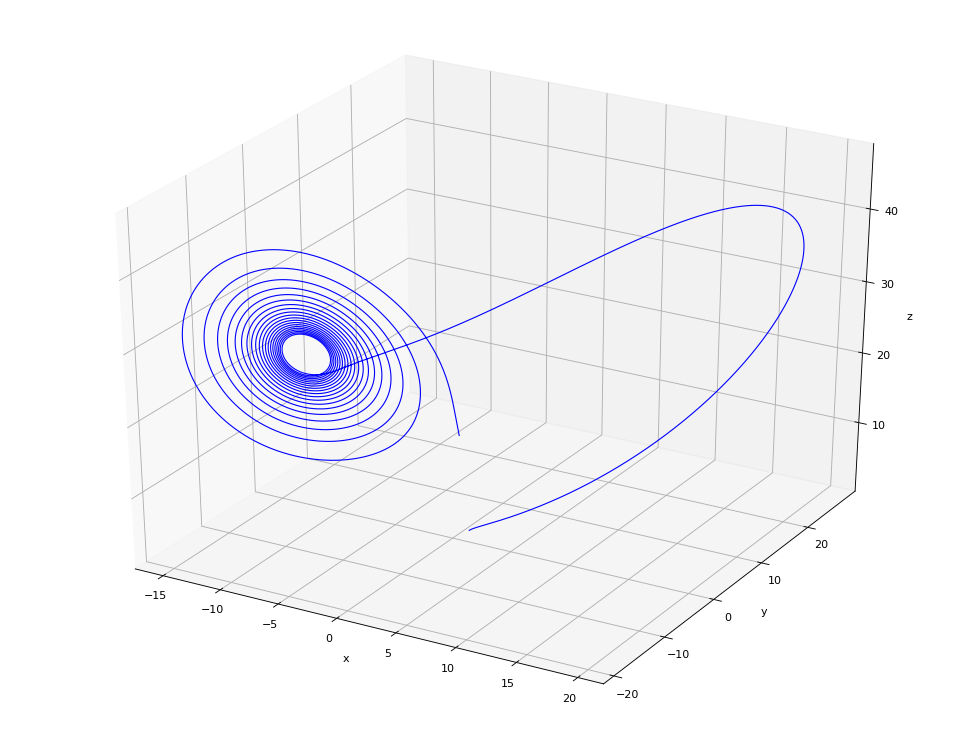

ran for 218 steps over 13.625; 16017 adaptive steps
[0.3204740767917288, 0.6802329621153606, 14.534129973520708]
(3.597588853236317, 3.635229302818003, -38.539682898851325)
0.0020793251783969846 0.002091583757466431 -0.02229332211677182


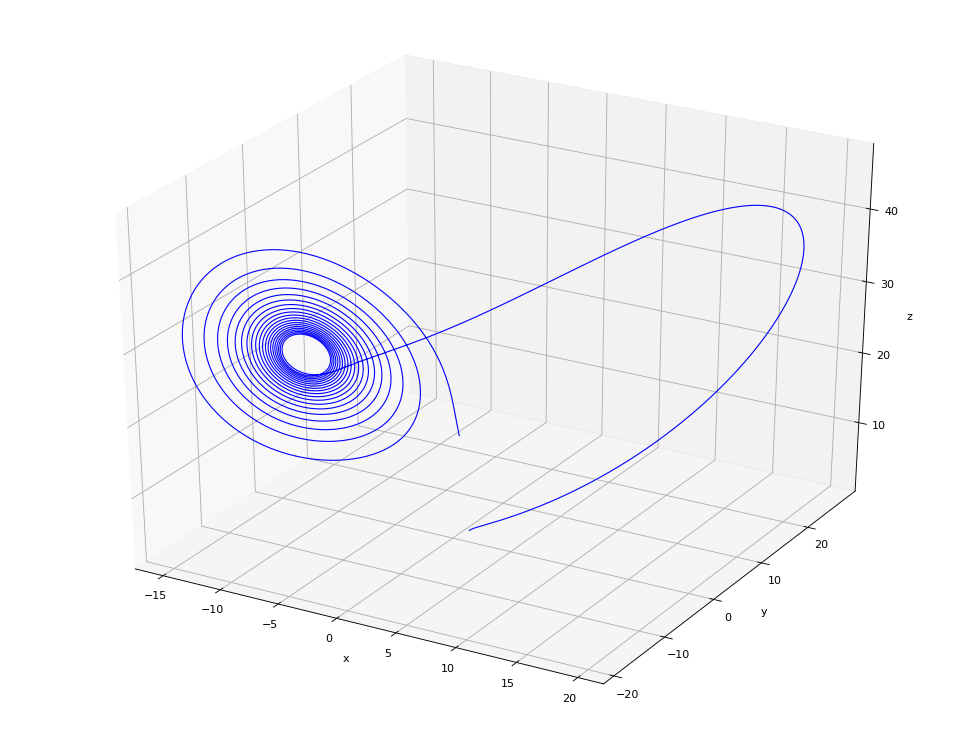

ran for 3488 steps over 13.625; 16018 adaptive steps
[0.32124040705612467, 0.681008596993472, 14.525923052243407]
(3.597681899373473, 3.647409366409401, -38.51702732707551)
0.0020820169413803824 0.0021012875933286157 -0.022308724771617605


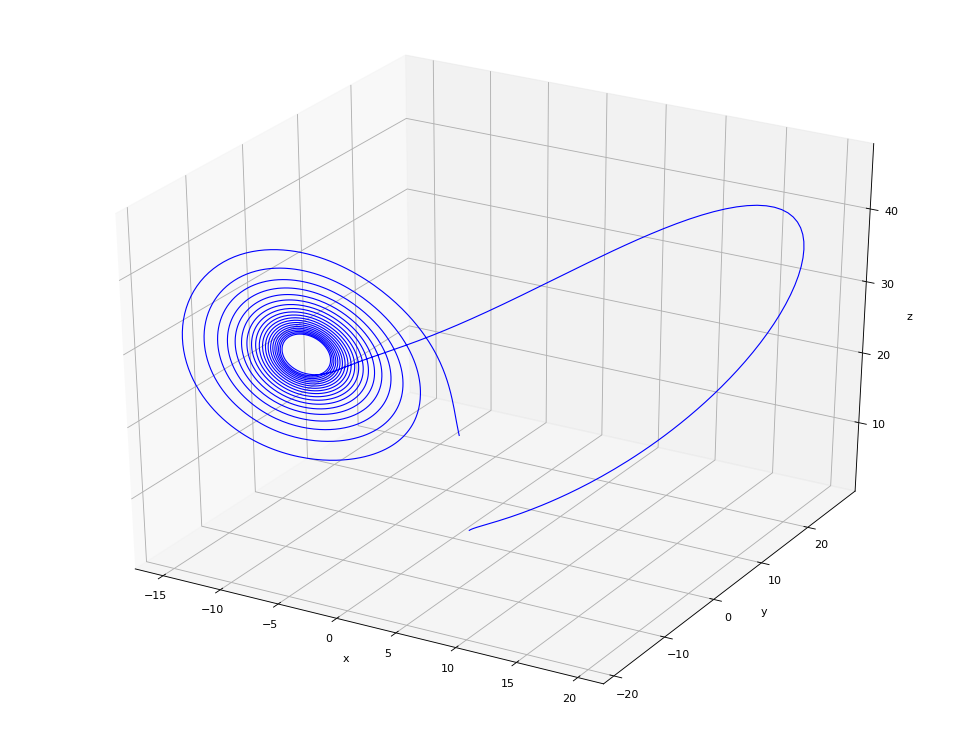

[0.3204149118343516, 0.6803619710640186, 14.53813379056759]
(3.59947059229667, 3.6330207035571047, -38.55035865387298)
0.014063554947269075 0.013757113013728173 -0.15140160406756387


In [2]:
obj = RKplot3D(dt=1/16, step=218, pp=False)
obj.run_adapt(eqn=lorenz, ic=lorenz_ic, eps=1/100000000)

obj = RKplot3D(dt=1/256, step=218*16, pp=False)
obj.run_adapt(eqn=lorenz, ic=lorenz_ic, eps=1/100000000)

obj = RKplot3D(dt=1/256, step=218*16, pp=False)
obj.run(eqn=lorenz, ic=lorenz_ic, method=rk4)

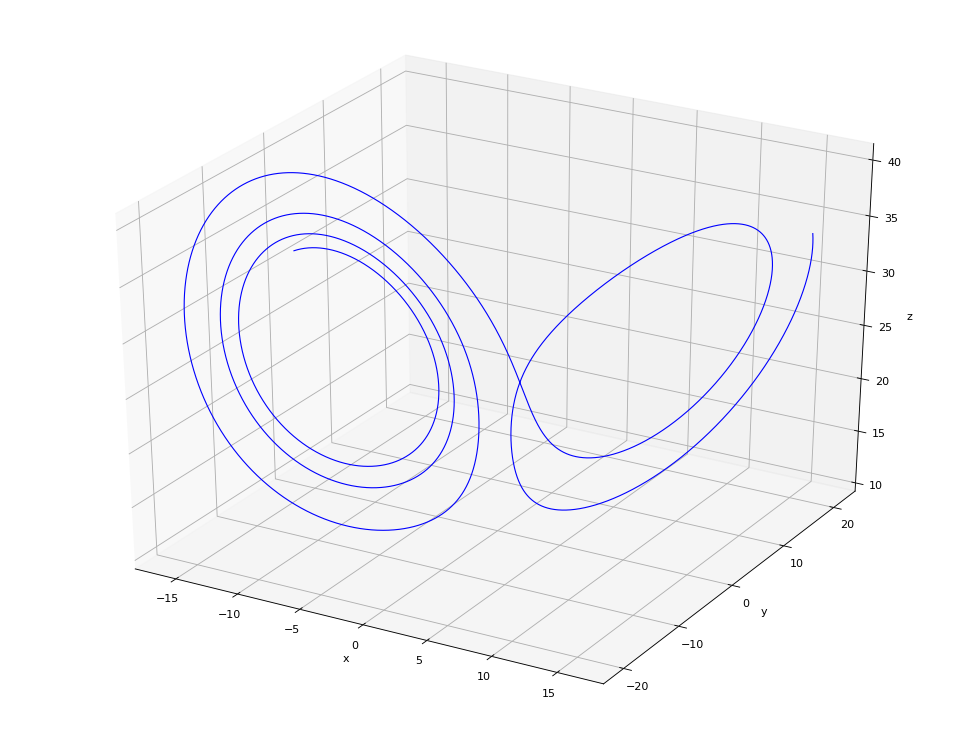

[16.157760096498592, 19.29168560322699, 34.45572835102259]
(31.339255067284, -123.60179554721446, 219.82848556462386)
0.0019156815427479046 -0.007537291083448139 0.013420948224705853


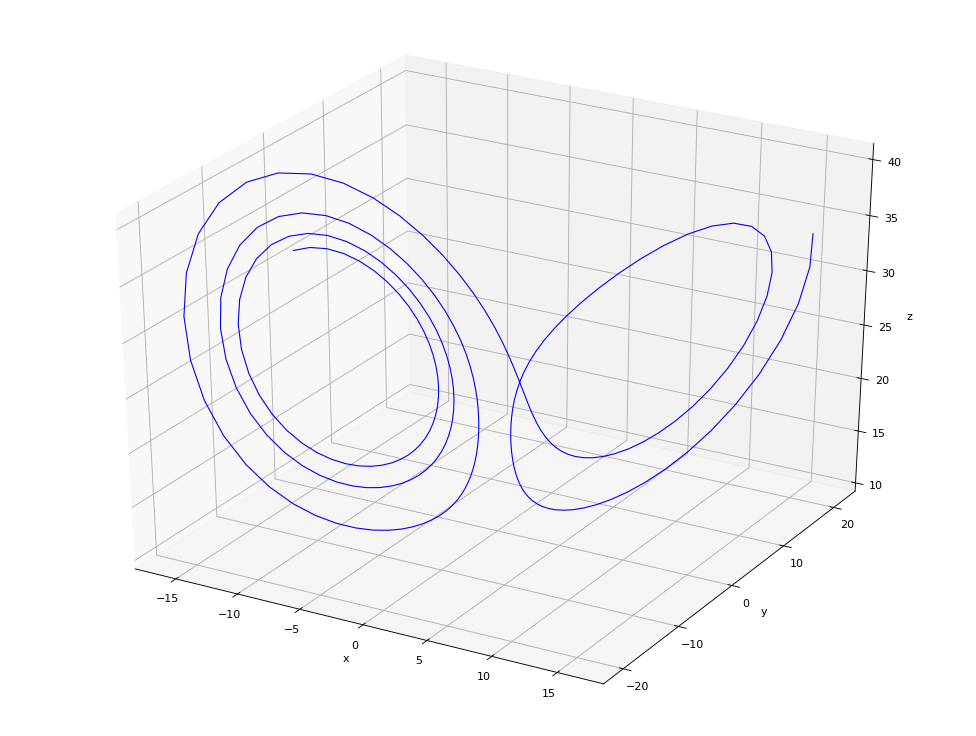

[16.150602414320232, 19.33384445991067, 34.390657486127616]
(31.832420455904355, -122.54681268445705, 220.54481504931812)
0.6712685934369791 -1.4572151332661285 3.625439386342162


In [2]:
lorenz_case_ic = (-12, -8.5, 35)
lorenz_case_steps = 60

lo_scale = 4
mid_scale = 4 * lo_scale
hi_scale = 256 * lo_scale

eps = 1/100000

obj = RKplot3D(dt=1/(16*hi_scale), step=lorenz_case_steps*hi_scale, pp=False)
obj.run(eqn=lorenz, ic=lorenz_case_ic, method=rk4)

obj = RKplot3D(dt=1/(16*lo_scale), step=lorenz_case_steps*lo_scale, pp=False)
obj.run(eqn=lorenz, ic=lorenz_case_ic, method=rk4)

#obj = RKplot3D(dt=1/(16*euler_scale), step=lorenz_case_steps*euler_scale, pp=False)
#obj.run(eqn=lorenz, ic=lorenz_case_ic, method=midpoint)

#obj = RKplot3D(dt=1/(16*mid_scale), step=lorenz_case_steps*mid_scale, pp=False)
#obj.run_adapt(eqn=lorenz, ic=lorenz_case_ic, eps=eps)

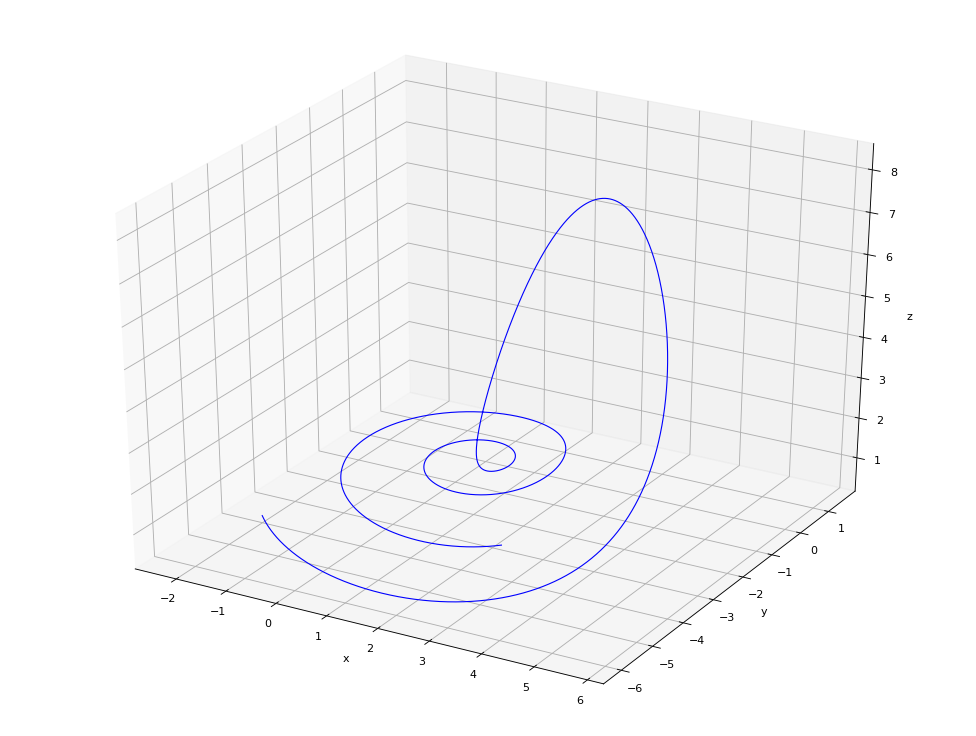

[2.657846664768899, -3.7744623073353787, 0.8443226374976325]
(2.930139669837746, 1.0272789480000155, 0.8667895560714332)
0.0007154225666101688 0.00025069997257975984 0.00021157948865480058


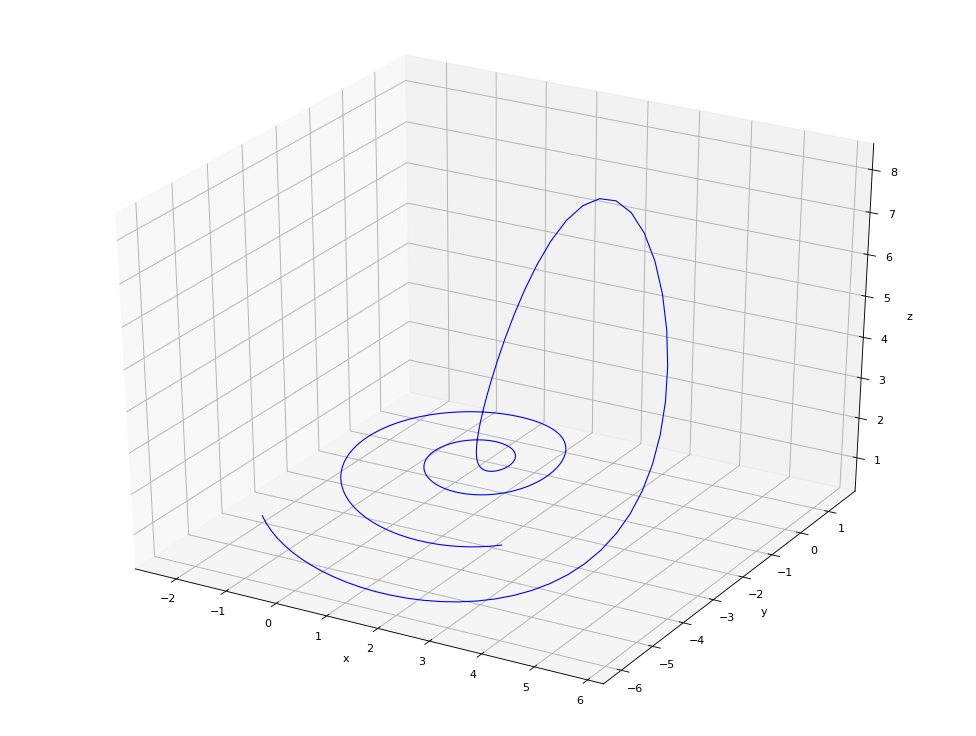

[2.657699007300507, -3.7743805331847944, 0.8442881434407069]
(2.9300923897440874, 1.0271666169646758, 0.8667111869351269)
0.1866399829405534 0.05759370119247054 0.05167953394070357


In [3]:
rossler_case_ic = (-2.0, -4.0, 1/3)
rossler_case_steps = 270

lo_scale = 1
mid_scale = 4 * lo_scale
hi_scale = 256 * lo_scale

eps = 1/100000

obj = RKplot3D(dt=1/(16*hi_scale), step=rossler_case_steps*hi_scale, pp=False)
obj.run(eqn=rossler, ic=rossler_case_ic, method=rk4)

obj = RKplot3D(dt=1/(16*lo_scale), step=rossler_case_steps*lo_scale, pp=False)
obj.run(eqn=rossler, ic=rossler_case_ic, method=rk4)

#obj = RKplot3D(dt=1/(16*lo_scale), step=rossler_case_steps*lo_scale, pp=False)
#obj.run(eqn=rossler, ic=rossler_case_ic, method=midpoint)

#obj = RKplot3D(dt=1/(16*lo_scale), step=rossler_case_steps*lo_scale, pp=False)
#obj.run_adapt(eqn=rossler, ic=rossler_case_ic, eps=eps)


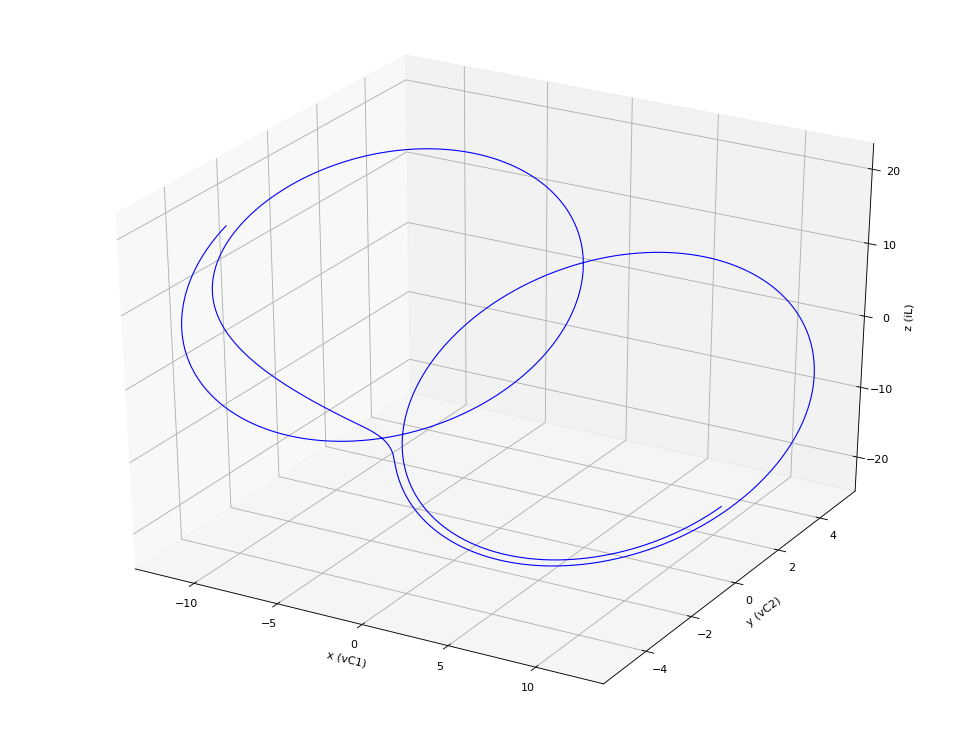

[-11.144614016405676, -3.2978348452700295, 18.095962885507102]
(4.7828401815438415, 6.301608732856075, 23.084843916890208)
0.0005837279460383371 0.0007691573038060007 0.002818302742085166


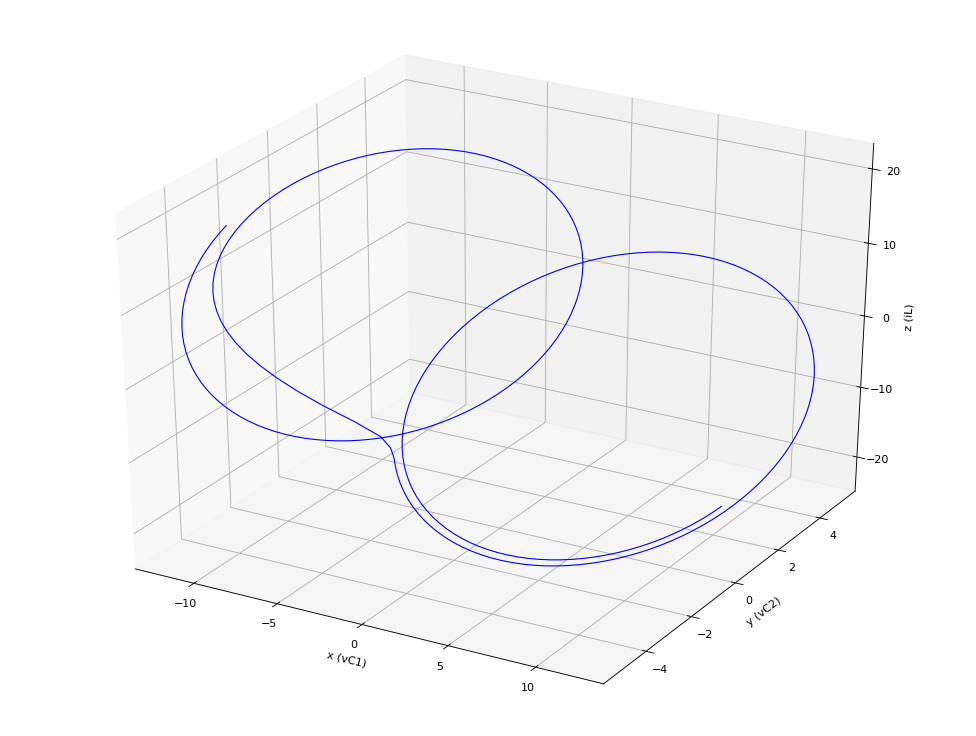

[-11.134467522594422, -3.2905836331173126, 18.06696794129634]
(4.772719703745345, 6.288124609331182, 23.03408543182119)
0.14156127443994038 0.19103665847463525 0.7409109165124548


In [5]:
chua_case_ic = (10.2, 2.2, -21.2)
chua_case_steps = 140

lo_scale = 2
mid_scale = 4 * lo_scale
hi_scale = 256 * lo_scale

eps = 1/100000

obj = RKplot3D(dt=1/(16*hi_scale), step=chua_case_steps*hi_scale, pp=False)
obj.run(eqn=chua, ic=chua_case_ic, method=rk4)

obj = RKplot3D(dt=1/(16*lo_scale), step=chua_case_steps*lo_scale, pp=False)
obj.run(eqn=chua, ic=chua_case_ic, method=rk4)

#obj = RKplot3D(dt=1/(16*mid_scale), step=chua_case_steps*mid_scale, pp=False)
#obj.run(eqn=chua, ic=chua_case_ic, method=midpoint)

#obj = RKplot3D(dt=1/(16*mid_scale), step=chua_case_steps*mid_scale, pp=False)
#obj.run_adapt(eqn=chua, ic=chua_case_ic, eps=eps)

(array([3., 0., 1., 0., 0., 1., 0., 0., 0., 1.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <a list of 10 Patch objects>)

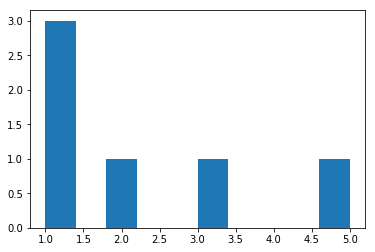

In [4]:
import matplotlib.pyplot as plt
from matplotlib.axes import Axes


# x = [1,2,3,4,5]
# y = [1.3,4.8,4.9,5.3,7.0]

# fig = plt.figure(figsize=(12,9), dpi=80)
# ax = fig.gca()

# ax.plot(x)
# ax.plot(x,y)


# fig = plt.figure(figsize=(12,5), dpi=80)
# ax = fig.gca()

# ax.plot(x)
# ax.plot(x,y)


x = [1,1,1,5,3,2]

plt.hist(x)
